## 聚类

In [32]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

from sklearn.preprocessing import scale

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.decomposition import PCA

In [3]:
df = pd.read_excel('cluster_small_hw-en.xlsx')

In [4]:
df.head()

,cust_no,idAge,idGender,idProvince,Last_purchase,Begin_date,Execute_date,Store_no,saleDate,transaction_id,time_stamp,goodID,amount,count
0,341003015529200S,28.0,0.0,guangdong,2015-01-03 11:05:00,2008-11-10 12:00:00,2014-09-13 14:04:00,15,20140918,242661,201409181001,1.010010e+09,8.2,3
1,341003097552691S,NaN,NaN,NaN,2014-12-19 21:11:00,2013-10-11 12:00:00,2014-09-01 04:41:00,97,20140112,361923,201401122103,4.311011e+09,4.0,1
2,341003029133276S,21.0,1.0,henan,2014-12-30 20:49:00,2014-03-01 12:00:00,2014-04-28 19:58:00,29,20140612,217023,201406121941,2.120090e+09,17.5,1
3,341003046612716S,26.0,1.0,henan,2014-11-22 18:08:00,2014-10-14 18:40:00,2014-10-14 00:00:00,46,20141024,310854,201410242012,2.120170e+09,14.2,1
4,341003030062675S,45.0,1.0,hebei,2014-04-29 03:46:00,2011-09-15 12:00:00,2014-04-29 03:09:00,30,20140123,120878,201401231940,2.120090e+09,64.0,1


首先处理地理数据：根据省份把他们划分为不同的地区，分为华南、华东、华北、华中、西南、西北、东北七个地区。  
注：中国（除港澳台外）行政区划   
华北（北京、天津、河北、山西、内蒙古）  
东北（辽宁、吉林、黑龙江）  
华东（上海、江苏、浙江、江西、安徽、福建、山东）  
中南（河南、湖北、湖南、广东、广西、海南）  
西南（重庆、四川、贵州、云南、西藏）  
西北（陕西、甘肃、青海、宁夏、新疆）  

In [5]:
df['idProvince'].value_counts().head()

guangdong    13807
shanghai      5875
jiangsu       2790
anhui         2281
henan         2096
Name: idProvince, dtype: int64

In [8]:
#将地域分类编码（1:South，2:East，3:Southwest，4:North，5:Southnorth,6:Northeast）
def province(a):
    if a in ['guangdong','guangxi','hainan','hunan','henan','hubei']:
        return 1;
    if a in ['shanghai','jiangsu','zhejiang','jiangxi','anhui','fujian','shandong']:
        return 2;
    if a in ['chongqing','sichuan','guizhou','yunnan','xizang']:
        return 3;
    if a in ['beijing','tianjin','hebei','shanxi','neimenggu']:
        return 4;
    if a in ['shaanxi','gansu','qinghai','ningxia','xinjiang']:
        return 5;
    if a in ['liaoning','jilin','heilongjiang']:
        return 6;
df['idProvince'] = df['idProvince'].apply(lambda x: province(x))

然后处理时间数据，将最后一次购买时间(Last_purchase)减去开始购买时间(Begin_date)，来观察用户在超市的购买经历长短，可以体现他们的消费粘性。Execute_date不确定其明确含义，差距不大，故删去。

In [31]:
df['Register_length'] = 0
for i in df.index:
    df['Register_length'][i] = (df['Last_purchase'][i] - df['Begin_date'][i]).days

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [39]:
df = df.drop('Execute_date',axis = 1).drop('cust_no',axis = 1).fillna(0)

In [45]:
df = df.drop('Begin_date',axis = 1).drop('Last_purchase',axis = 1)

In [44]:
df.dtypes

idAge              float64
idGender           float64
idProvince         float64
Last_purchase       object
Begin_date          object
Store_no             int64
saleDate             int64
transaction_id       int64
time_stamp           int64
goodID             float64
amount             float64
count                int64
Register_length    float64
dtype: object

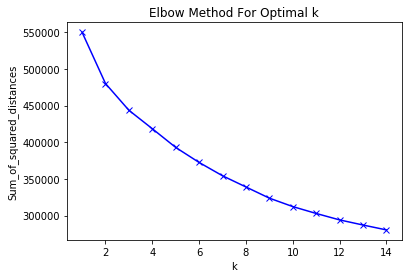

In [46]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    kmeans = KMeans(n_clusters=k)
    scaler=StandardScaler()
    pipeline=make_pipeline(scaler,kmeans)
    pipeline.fit(df)
    Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [48]:
kmeans = KMeans(n_clusters=3)
scaler=StandardScaler()
pipeline=make_pipeline(scaler,kmeans)
pipeline.fit(df)
Sum_of_squared_distances.append(kmeans.inertia_)
labels=pipeline.predict(df)
print(kmeans.inertia_)

443612.0455157917


In [52]:
df['labels'] = labels

In [76]:
explore1 = df[df['labels']==0].describe(percentiles = [], include = 'all').T
explore2 = df[df['labels']==1].describe(percentiles = [], include = 'all').T
explore3 = df[df['labels']==2].describe(percentiles = [], include = 'all').T

In [77]:
explore1

,count,mean,std,min,50%,max
idAge,9459.0,8.783592e+00,1.357236e+01,0.000000e+00,0.000000e+00,4.600000e+01
idGender,9459.0,5.814568e-03,7.603532e-02,0.000000e+00,0.000000e+00,1.000000e+00
idProvince,9459.0,3.307961e-01,5.358711e-01,0.000000e+00,0.000000e+00,3.000000e+00
Store_no,9459.0,6.777862e+01,3.370572e+01,1.000000e+00,8.200000e+01,1.050000e+02
saleDate,9459.0,2.014065e+07,2.669379e+02,2.014010e+07,2.014063e+07,2.014123e+07
transaction_id,9459.0,1.907915e+05,9.349672e+04,1.002100e+04,1.835860e+05,9.157480e+05
time_stamp,9459.0,2.014065e+11,2.669454e+06,2.014010e+11,2.014063e+11,2.014123e+11
goodID,9459.0,3.057105e+09,2.354588e+09,0.000000e+00,2.120501e+09,1.098103e+10
amount,9459.0,1.883967e+01,3.377327e+01,-1.676000e+02,1.050000e+01,1.200000e+03
count,9459.0,1.244000e+00,6.539603e-01,1.000000e+00,1.000000e+00,1.100000e+01


In [78]:
explore2

,count,mean,std,min,50%,max
idAge,19578.0,3.932225e+01,1.339071e+01,8.000000e+00,3.500000e+01,1.140000e+02
idGender,19578.0,5.856574e-01,4.926208e-01,0.000000e+00,1.000000e+00,1.000000e+00
idProvince,19578.0,1.998161e+00,1.319051e+00,0.000000e+00,2.000000e+00,6.000000e+00
Store_no,19578.0,4.958704e+01,3.224091e+01,1.000000e+00,4.300000e+01,1.030000e+02
saleDate,19578.0,2.014040e+07,1.649326e+02,2.014010e+07,2.014042e+07,2.014083e+07
transaction_id,19578.0,2.027410e+05,1.000175e+05,1.000500e+04,1.932120e+05,9.279730e+05
time_stamp,19578.0,2.014040e+11,1.649322e+06,2.014010e+11,2.014042e+11,2.014083e+11
goodID,19578.0,2.756133e+09,1.908695e+09,1.010010e+09,2.120500e+09,7.511040e+09
amount,19578.0,2.218761e+01,4.223858e+01,-2.590000e+02,1.160000e+01,1.936000e+03
count,19578.0,1.264276e+00,6.928821e-01,1.000000e+00,1.000000e+00,1.400000e+01


In [79]:
explore3

,count,mean,std,min,50%,max
idAge,20962.0,3.983298e+01,1.381851e+01,0.000000e+00,3.600000e+01,1.130000e+02
idGender,20962.0,5.799065e-01,4.935854e-01,0.000000e+00,1.000000e+00,1.000000e+00
idProvince,20962.0,1.906068e+00,1.248367e+00,0.000000e+00,2.000000e+00,6.000000e+00
Store_no,20962.0,5.114832e+01,3.325656e+01,1.000000e+00,4.600000e+01,1.050000e+02
saleDate,20962.0,2.014092e+07,1.682090e+02,2.014060e+07,2.014091e+07,2.014123e+07
transaction_id,20962.0,2.001938e+05,9.677262e+04,1.032500e+04,1.912775e+05,9.270200e+05
time_stamp,20962.0,2.014092e+11,1.682106e+06,2.014060e+11,2.014091e+11,2.014123e+11
goodID,20962.0,3.284168e+09,2.741722e+09,0.000000e+00,2.120501e+09,1.098103e+10
amount,20962.0,1.862295e+01,3.103996e+01,-1.424000e+02,9.900000e+00,1.125000e+03
count,20962.0,1.242963e+00,6.560478e-01,1.000000e+00,1.000000e+00,1.400000e+01
